In [1]:
# https://docs.google.com/spreadsheets/d/1ycs9Ma3eN1iHTx9oBghzLDWlD-dKLJXUOrVauXs8dCA/edit#gid=0

import pandas as pd
from datetime import timedelta
#from datetime import time

import matplotlib.pyplot as plt 
import numpy as np
import sklearn.linear_model

import time
import datetime
d = datetime.date(2015,1,5)

unixtime = time.mktime(d.timetuple())
print(d, "is", unixtime)

google_url = "https://docs.google.com/spreadsheets/d/1ycs9Ma3eN1iHTx9oBghzLDWlD-dKLJXUOrVauXs8dCA/export?format=csv&gid=0"
electric_bill = pd.read_csv(google_url, 
                            parse_dates=["date", "date_time"],
                            dtype={'count1': 'float64', 'count2': 'float64'})
print(electric_bill.dtypes);
electric_bill[['date','count1','date_time','Paid']]

2015-01-05 is 1420437600.0
date              datetime64[ns]
count1                   float64
count2                   float64
time                      object
notes                     object
used (kWh)               float64
date_time         datetime64[ns]
hours                    float64
kW                       float64
Average                  float64
Estimate ($)              object
Estimate (kWh)            object
Paid                      object
dtype: object


,date,count1,date_time,Paid
0,2019-09-05,58150.0,2019-09-05 00:00:00,NaN
1,2019-10-04,60664.0,2019-10-04 00:00:00,$292.04
2,2019-11-04,62237.0,2019-11-04 00:00:00,$184.64
3,2019-12-05,63875.0,2019-12-05 00:00:00,$191.93
4,2020-01-08,65920.0,2020-01-08 00:00:00,$237.43
...,...,...,...,...
70,2020-04-10,70997.0,2020-04-10 12:57:00,NaN
71,2020-04-10,71003.0,2020-04-10 15:45:00,NaN
72,2020-04-10,71007.0,2020-04-10 18:41:00,NaN
73,2020-04-10,71013.0,2020-04-10 21:17:00,NaN


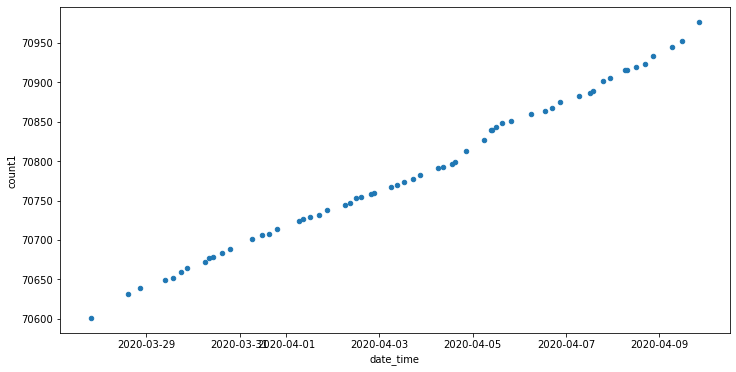

In [2]:
electric_stats = electric_bill[['date_time','count1']]

start_period = datetime.datetime(2020,3,10)
end_period = datetime.datetime(2020,4,10)   # datetime.datetime.now()

electric_stats = electric_stats[(electric_stats['date_time'] > start_period) 
                                & (electric_stats['date_time'] < end_period)].copy()
electric_stats.plot(kind ='scatter', x ="date_time", y ='count1', figsize=(12, 6))
plt.show()

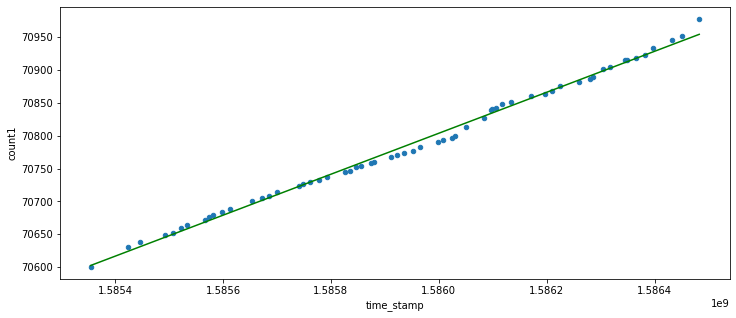

In [3]:
electric_stats['time_stamp'] = electric_stats['date_time'].apply(lambda d: time.mktime(d.timetuple()))

X = np.c_[electric_stats["time_stamp"]] 
y = np.c_[electric_stats["count1"]] 

electric_stats.plot(kind ='scatter', x ="time_stamp", y ='count1', figsize=(12, 5))

# Select a linear model 
model = sklearn.linear_model.LinearRegression() 

# Train the model 
model.fit(X, y) 

y_predict = model.predict(X)
plt.plot(X, y_predict, color='green')
plt.show()

In [4]:
def get_model_coef(model):
    '''Returns (a,b) linear coeficients of the model  y = aX + b'''
    b = model.predict([[0.0]]);
    a = model.predict([[1.0]]) - b;
    
    return (a[0][0], b[0][0])

# test
AB = get_model_coef(model)
print('AB =', AB)
print("Average kW =", 3600 * AB[0])

AB = (0.00031180999940261245, -423726.7767322598)
Average kW = 1.1225159978494048
